In [56]:

# Importing Libraries

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sb
import plotly.offline as po
import plotly.graph_objs as go
po.init_notebook_mode(connected=True)
from plotly import tools
import plotly.figure_factory as ff

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Loading Data
mulchrep = pd.read_csv('multipleChoiceResponses.csv', encoding='ISO-8859-1')
mulchrep.head()

,GenderSelect,Country,Age,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,TitleFit,...,JobFactorExperienceLevel,JobFactorDepartment,JobFactorTitle,JobFactorCompanyFunding,JobFactorImpact,JobFactorRemote,JobFactorIndustry,JobFactorLeaderReputation,JobFactorDiversity,JobFactorPublishingOpportunity
0,"Non-binary, genderqueer, or gender non-conforming",NaN,NaN,Employed full-time,NaN,NaN,Yes,NaN,DBA/Database Engineer,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Female,United States,30.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Somewhat important,NaN,NaN
2,Male,Canada,28.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important
3,Male,United States,56.0,"Independent contractor, freelancer, or self-em...",NaN,NaN,Yes,NaN,Operations Research Practitioner,Poorly,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Male,Taiwan,38.0,Employed full-time,NaN,NaN,Yes,NaN,Computer Scientist,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**The tech world seems still a man's world.**

In [57]:
# Assigning color to pie slice
colors = ['aqua', 'lightgrey', 'lightgreen', '#D0F9B1', 'khaki', 'grey']

# Renaming a gender 
mulchrep['GenderSelect'] = np.where(mulchrep['GenderSelect'] == 'Non-binary, genderqueer, or gender non-conforming', 'Non-binary',
                                    mulchrep['GenderSelect'])

gender = mulchrep['GenderSelect'].value_counts()
label = gender.index
size = gender.values

# Plotting the Pie Chart to display the Gender Distribution
trace = go.Pie(
    labels = label,
    values = size,
    marker = dict(colors=colors)
)

data = [trace]
layout = go.Layout(title = 'Gender Distribution')

fig = go.Figure(data = data, layout=layout)
po.iplot(fig)

**Top 5 countries**
1. USA - 4197 participants
2. India - 2704 participants
3. Russia - 578 participants
4. United Kingdom - 535  participants
5. China - 471 participants

In [80]:
df = pd.DataFrame(mulchrep['Country'].value_counts())
df['country'] = df.index
df.columns = ['number', 'country']
df = df.reset_index().drop('index', axis=1)

data = [dict(
        type = 'choropleth',
        locations = df['country'],
        locationmode = 'country names',
        z = df['number'],
        text = df['country'],
        colorscale = [[0,"rgb(5, 10, 172)"],[0.35,"rgb(40, 60, 190)"],
                      [0.5,"rgb(70, 100, 245)"],
            [0.6,"rgb(90, 120, 245)"],[0.7,"rgb(106, 137, 247)"],
                      [1,"rgb(220, 220, 220)"]],
        autocolorscale = False,
        reversescale = True,
        marker = dict(
            line = dict (
                color = 'rgb(180,180,180)',
                width = 0.5
            ) 
        ),
        colorbar = dict(
            autotick = False,
            tickprefix = '$',
            title = 'Survey Respondents')
)
       ]

layout = dict(
    title = 'The Nationality of Respondents',
    geo = dict(
        showframe = False,
        showcoastlines = True,
        projection = dict(
            type = 'Mercator')
    )
)

fig = dict(data=data, layout=layout)
po.iplot(fig, validate=False)

**Age Distribution in 2017 (left) vs 2018 (right):**

* 18-21: **7.2% - 12.7%**
* 22-24: **14.9% - 21.5%**
* 25-29: **25.9% - 25.8%**
* 30-34: **18.5% - 15.8%**
* 35-39: **12.6% - 9.4%**
* 40-44: **7.7% - 5.7%**
* 44+: **12.9% - 8.4%**

In [59]:
# Subsetting for age greater than 18 but less than 75
mulchrep = mulchrep[(mulchrep['Age'] < 75) & (mulchrep['Age'] > 18)]
# Getting the relative frequency of age 
age = round(mulchrep['Age'].value_counts(normalize=True), 4)

# Plotting a Bar Chart to display the Age Distribution
trace = go.Bar(
    x=age.index,
    y=age.values,
    marker=dict(
        color=age.values,
        colorscale='Reds',
        showscale=True
    )
)

data = [trace]
layout = go.Layout(title='Age Distribution', 
                   yaxis = dict(title = '# of Respondents'))

fig = go.Figure(data=data, layout=layout)
fig['layout']['xaxis'].update(dict(title='Age',
                                   tickfont = dict(size = 12)))
po.iplot(fig)

**We can say that online courses (MOOC) are mainstream training platforms of data science.**

In [60]:
train = mulchrep['FirstTrainingSelect'].value_counts()
label = train.index
size = train.values
colors = ['aqua', 'lightgrey', 'lightgreen', '#D0F9B1', 'khaki', 'grey']

trace = go.Pie(labels=label,
               values=size,
               marker=dict(colors=colors))

data = [trace]
layout=go.Layout(
    title='First Training Platform',
    legend=dict(orientation='h')
)

fig = go.Figure(data=data, layout=layout)
po.iplot(fig)

**Coursera seems the leader of MOOCs thanks to Andrew NG's' [amazing machine learning courses](http://www.coursera.org/instructor/andrewng).**
* **After learning basics of machine learning, people discover the world of Kaggle so although it is the last first learning platform in the above ranking, it is graded as the best learning platform.**
* **Online courses and Stack & Overflow are preferred to textbooks and university courses. The changing face of education in the 21st century!**

In [61]:
course = mulchrep['CoursePlatformSelect'].str.split(',')
course_set = []

for i in course.dropna():
    course_set.extend(i)
courses = round(pd.Series(course_set).value_counts(normalize=True)[:5], 4).\
        sort_values(ascending=False).to_frame()

trace1 = go.Bar(
    x=courses.index,
    y=courses[0],
    name='course',
    marker=dict(
        color=courses[0],
        colorscale='Jet'
    )
)

learning = mulchrep['LearningPlatformSelect'].str.split(',')
learning_set = []
for i in learning.dropna():
    learning_set.extend(i)
learn = round(pd.Series(learning_set).value_counts(normalize=True)[:5], 4).\
        sort_values(ascending=False).to_frame()

trace2 = go.Bar(
    x=learn.index,
    y=learn[0],
    name='platform',
    marker=dict(
        color=learn[0],
        colorscale='Jet'
    )
)

fig = tools.make_subplots(rows=1, cols=2, subplot_titles=('Course Platforms', 
                                                             'Learning Platforms'))
fig.append_trace(trace1, 1,1)
fig.append_trace(trace2, 1,2)
fig['layout'].update(
    height=500, 
    width=820,
    title='Where to start & How to continue in DS',
    showlegend=False
)
po.iplot(fig)

**Basic laptop is enough to follow data science trends so hardware requirements is no excuse not to discover the world.**

In [62]:
hardware = mulchrep['HardwarePersonalProjectsSelect'].str.split(',')
hardware_set = []
for i in hardware.dropna():
    hardware_set.extend(i)
    hware = pd.Series(hardware_set).value_counts()[:6]

label = hware.index
size = hware.values

colors = ['#FEBFB3', 'skyblue', '#96D38C', '#D0F9B1', 'tan', 'lightgrey']

trace = go.Pie(
    labels=label,
    values=size,
    marker=dict(colors=colors)
)

data = [trace]
layout=go.Layout(
    title='Hardware Requirements',
    legend=dict(orientation='h')
)

fig = go.Figure(data=data, layout=layout)
po.iplot(fig)

**The most wondering part of the survey is probably salaries. I think that there is no surprise in the ranking. However, before accepting a job offer,  I would recommend you to check [purchasing power parities](http://data.oecd.org/conversion/purchasing-power-parities-ppp.htm).** 

**Note: Although I calculate median salary that is more robust to outliers I dropped rate-adjusted monthly salaries less than 100 dollars more than 500.000 dollars for the following parts.**

In [63]:
mulchrep['CompensationAmount'] = mulchrep['CompensationAmount'].str.replace(',','')
mulchrep['CompensationAmount'] = mulchrep['CompensationAmount'].str.replace('-','')

salary = mulchrep[['CompensationAmount', 'CompensationCurrency', 'Country', 'JobSatisfaction', 
                    'CurrentJobTitleSelect', 'Age', 'GenderSelect']].dropna()

crates = pd.read_csv('conversionRates.csv')
crates.drop('Unnamed: 0', axis=1, inplace=True)
salary = salary.merge(crates, left_on='CompensationCurrency', right_on='originCountry', how='left')
salary['Salary'] = pd.to_numeric(salary['CompensationAmount']) * salary['exchangeRate']

us_salary = salary[(salary['Salary'] > 100) & (salary['Salary'] < 500000) & 
                   (salary['Country'] == 'United States')] 
non_us_salary = salary[(salary['Salary'] > 100) & (salary['Salary'] < 500000) & 
                   (~(salary['Country'] == 'United States'))] 
sal_coun = salary.groupby('Country')['Salary'].median().round(-2).sort_values(ascending=False)[:16].\
    to_frame()

trace = go.Bar(
    x=sal_coun.index,
    y=sal_coun.Salary,
    marker=dict(
        color=sal_coun.Salary,
        colorscale='Reds'
    )
)

data = [trace]
layout = go.Layout(
    title = 'Top Countries with Highest Median Salaries',
    yaxis = dict(title='Salary ($)')
)

fig = go.Figure(data=data, layout=layout)
po.iplot(fig)

**If you are a newbie, do not be in a hurry about salary, it increases. Learn as many new technologies as possible and be an active member of the data science community.**

**Since there is a big wage gap between US & non-US countries, I analyze them seperately. Do not mix apples & oranges.**

In [64]:
us_group = us_salary.groupby('Age')['Salary'].median().to_frame()
non_us_group = non_us_salary.groupby('Age')['Salary'].median().to_frame()

trace0 = go.Scatter(
    x = non_us_group.index,
    y = us_group['Salary'].round(-2),
    name = 'US',
    mode='markers',
    marker=dict(
        size=9,
        color=('aqua')
    )
)

trace1 = go.Scatter(
    x = non_us_group.index,
    y = non_us_group['Salary'].round(-2),
    name= 'Non-US',
    mode = 'markers',
    marker = dict(
          size=9,
          color=('navy')
    )
)

data = [trace0, trace1]
layout = dict(
    title = 'The Median Salary by Age in US and Non-US Countries',
    xaxis = dict(title = 'Age'),
    yaxis = dict(title = 'Salary ($)')
)

fig = dict(data=data, layout=layout)
fig['layout']['xaxis'].update(dict(title = 'Age', tickfont = dict(size = 12)))
po.iplot(fig)

**Correlation does not imply causation but it seems that satisfaction and salary go hand in hand.**

In [65]:
salary['JobSatisfaction'].replace({'10 - Highly Satisfied':'10', '1 - Highly Dissatisfied':'0',
                                  'I prefer not to share':np.NaN}, inplace = True)

salary.dropna(subset=['JobSatisfaction'], inplace=True)
salary['JobSatisfaction'] = salary['JobSatisfaction'].astype(int)

salary_us = salary[salary.originCountry == 'USD'].groupby('JobSatisfaction').Salary.mean().to_frame()
salary_non_us = salary[salary.originCountry != 'USD'].groupby('JobSatisfaction').Salary.mean().to_frame()

trace0 = go.Scatter(
    x = salary_us.index,
    y = salary_us['Salary'].round(-2),
    name = 'US',
    mode = 'markers',
    marker = dict(
        size=11,
        color=('navy')
    )
)

trace1 = go.Scatter(
    x = salary_non_us.index,
    y = salary_non_us['Salary'].round(-2),
    name = 'Non-Us',
    mode = 'markers',
    marker = dict(size=11, color = ('aqua'))
)

data = [trace0, trace1]
layout = dict(
    title = 'The Median Salary & Satisfaction in US & Non-US Countries',
    xaxis = dict(title = 'Job Satisfaction'),
    yaxis = dict(title = 'Salary ($)')
)

fig = dict(data=data, layout=layout)
fig['layout']['xaxis'].update(dict(title = 'Job Satisfaction',
                                   tickmode = 'linear',
                                   tickfont = dict(size = 10)))

po.iplot(fig)

**Let's combine age, job satisfaction and salary!**

In [66]:
salary = salary[salary.Salary<1000000]
dat = salary[['Age', 'JobSatisfaction', 'Salary']]
dat['index'] = np.arange(len(dat))
fig = ff.create_scatterplotmatrix(dat, diag='box', index='index',
                                  colormap_type='cat', colormap='Jet',
                                  height=800, width=800)

po.iplot(fig)

**It seems that there is no gender inequality in terms of salary in data science world.**

In [67]:
male_salary = salary[salary['GenderSelect'] == 'Male']
female_salary = salary[salary['GenderSelect'] == 'Female']
male = male_salary.groupby('Age').Salary.mean().to_frame()
female = female_salary.groupby('Age').Salary.mean().to_frame()

trace0 = go.Scatter(
    x = male.index,
    y = male['Salary'].round(-2),
    name = 'male',
    line = dict(
        color = 'Red',
        width = 2,
        dash = 'dash')
)

trace1 = go.Scatter(
    x = female.index,
    y = female['Salary'].round(-2),
    name = 'female',
    line = dict(
        color = 'navy',
        width = 2,
        dash = 'dash'
    )
)

data = [trace0, trace1]
layout = dict(title  = 'The Median Salary of Men & Women by Age',
              xaxis = dict(title = 'Age'),
              yaxis = dict(title = 'Salary ($)'))

fig = dict(data=data, layout=layout)
fig['layout']['xaxis'].update(dict(title = 'Age',
                                   tickfont = dict(size = 12)))
po.iplot(fig)

**But wait! After 60, there is something weird it could change all the picture. Maybe gender-gap?? Let's check box-plot!**

In [68]:
trace0 = go.Box(x=male_salary.Salary, name='Male', fillcolor='navy')
trace1 = go.Box(x=female_salary.Salary, name='Female', fillcolor='lime')
data = [trace0, trace1]
po.iplot(data)

**Yes, we are right to being suspicious. Median wage of male is higher than median wage of female.  
Let's investigate gender inequality in US vs. Non-US.**

In [69]:
male_us_salary = salary[(salary['GenderSelect'] == 'Male') & 
                        (salary.originCountry == 'USD')]
male_non_us_salary = salary[(salary['GenderSelect'] == 'Male') & 
                            (salary.originCountry != 'USD')]
female_us_salary = salary[(salary['GenderSelect'] == 'Female') & 
                          (salary.originCountry == 'USD')]
female_non_us_salary = salary[(salary['GenderSelect'] == 'Female') &
                              (salary.originCountry != 'USD')]

male_us = male_us_salary.groupby('Age').Salary.mean().to_frame()
male_nus = male_non_us_salary.groupby('Age').Salary.mean().to_frame()
female_us = female_us_salary.groupby('Age').Salary.mean().to_frame()
female_nus = female_non_us_salary.groupby('Age').Salary.mean().to_frame()

trace0 = go.Scatter(
    x = male_us.index,
    y = male_us['Salary'].round(-2),
    name = 'male',
    mode = 'markers',
    marker = dict(
        size = 8,
        color = ('grey')
    )
)

trace1 = go.Scatter(
    x = female_us.index,
    y = female_us['Salary'].round(-2),
    name = 'female',
    mode = 'markers',
    marker = dict(
        size = 8,
        color = ('red')
    )
)

data = [trace0, trace1]
layout = dict(
    title = 'The Median Salary of Men $ Women by Age in US',
    xaxis = dict(title = 'Age'),
    yaxis = dict(title = 'Salary ($)')
)

fig = dict(data=data, layout=layout)
fig['layout']['xaxis'].update(dict(title = 'Age',
                                   tickfont = dict(size = 12)))

po.iplot(fig)

trace0 = go.Scatter(
    x = male_nus.index,
    y = male_nus['Salary'].round(-2),
    name = 'male',
    mode = 'markers',
    marker = dict(
        size = 8,
        color = ('grey')
    )
)

trace1 = go.Scatter(
    x = female_nus.index,
    y = female_nus['Salary'].round(-2),
    name = 'female',
    mode = 'markers',
    marker = dict(
        size = 8,
        color = ('red')
    )
)

data = [trace0, trace1]
layout = dict(
    title = 'The Median Salary of Men # Women by Age in non-US countries',
    xaxis = dict(title = 'Age'),
    yaxis = dict(title = 'Salary ($)')
)

fig = dict(data=data, layout=layout)
fig['layout']['xaxis'].update(dict(title = 'Age',
                                   tickfont = dict(size = 12)))

po.iplot(fig)

**It seems that women are underpaid after 35 and they are out of labor force especially after their 50s in non-US countries!!**

**Let's investigate majors & titles. As expected, computer science, mathematics, statistics and engineering are leading degree majors in data science.**

In [70]:
mulchrep = mulchrep[~(mulchrep['MajorSelect'] == 'Other')]
mulchrep['MajorSelect'].replace({'Information technology, networking, or system administration':'IT, Networking, System Admin',
                                 'Mathematics or statistics':'Math or Stats',
                                 'Engineering (non-computer focused)':'Engineering (non-CS)',
                                 'IT, Network, System Admin':'IT-Network-System'}, inplace=True)

ms = round(mulchrep.MajorSelect.value_counts(normalize=True).to_frame()[:8], 4)
trace1 = go.Bar(
    x=ms.index,
    y=ms.MajorSelect,
    marker=dict(color='orange')
)

mulchrep['CurrentJobTitleSelect'].replace({'Software Developer/Software Engineer':'Software Developer',
                                           'Machine Learning Engineer':'ML Engineer'}, inplace=True)
cs = round(mulchrep.CurrentJobTitleSelect.value_counts(normalize=True).to_frame()[:8], 4)
trace2 = go.Bar(
    x=cs.index,
    y=cs.CurrentJobTitleSelect,
    marker=dict(color='navy')
)

fig = tools.make_subplots(rows=1, cols=2, subplot_titles=('Majors', 'Titles'))
fig.append_trace(trace1, 1,1)
fig.append_trace(trace2, 1,2)
fig['layout'].update(height=500, width=820, title='Majors & Titles in Data Science World',
                     showlegend=False)
po.iplot(fig)

In [71]:
def PieChart(column, title, limit):
    male = mulchrep[mulchrep['GenderSelect'] == 'Male']
    female = mulchrep[mulchrep['GenderSelect'] == 'Female']
    count_male = male[column].value_counts()[:limit].reset_index()
    count_female = female[column].value_counts()[:limit].reset_index()
    color = ['red', 'navy', 'cyan', 'lightgrey', 'orange', 'gold', 'lightgreen',
             '#D0F9B1', 'tomato', 'tan']
    
    trace1 = go.Pie(
        labels=count_male['index'],
        values=count_male[column],
        name='male',
        hole=.5,
        domain={'x': [0, .48]},
        marker=dict(colors=color)
    )
    
    trace2 = go.Pie(
        labels=count_female['index'],
        values=count_female[column],
        name='female',
        hole=.5,
        domain={'x': [.52, 1]}
    )
    
    layout = dict(
        title=title,
        font=dict(size=15),
        legend=dict(orientation='h'),
        annotations = [
            dict(
                x=.20, y=.5,
                text='Male',
                showarrow=False,
                font=dict(size=20)
            ),
            dict(
                x=.81, y=.5,
                text='Female',
                showarrow=False,
                font=dict(size=20)
            )
        ]
    )
    
    fig = dict(data=[trace1, trace2], layout=layout)
    
    po.iplot(fig)

In [72]:
PieChart('MajorSelect', "Undergraduate Major", 6)

**The rate of software engineers is higher in men than it is in women as in 2018 survey.**

**The rate of data analyst is higher in women than it is in men as in 2018 survey.**

In [73]:
PieChart('CurrentJobTitleSelect', "Job Title", 6)

* **Data scientists and machine learning engineers are not only highly paid, they also have higher job satisfaction.** 
* **Interestingly, even if researchers are underpaid, their job satisfaction is quite high compared to their salaries. That's why it is important to learn new things everyday.**

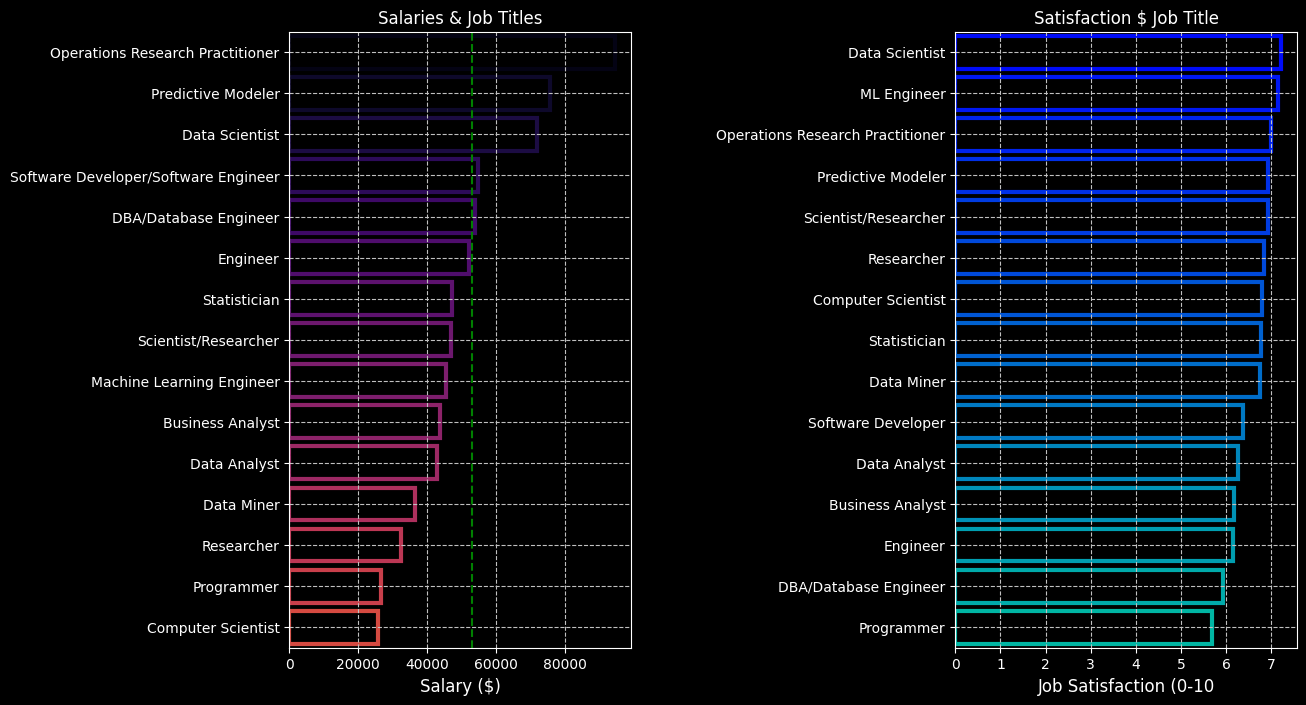

In [74]:
salary = salary[~(salary['CurrentJobTitleSelect'] == 'Other')]
mulchrep = mulchrep[~(mulchrep['CurrentJobTitleSelect'] == 'Other')]

f, ax=plt.subplots(1, 2, figsize=(13, 8))
sal_job = salary.groupby('CurrentJobTitleSelect')['Salary'].median().to_frame().sort_values(by='Salary',
                                                                                            ascending=False)
sb.barplot(sal_job.Salary, sal_job.index, facecolor=(0, 0, 0, 0), linewidth=3,
           edgecolor=sb.color_palette('inferno', 25), ax = ax[0])

ax[0].set_title('Salaries & Job Titles', fontsize=12)
ax[0].set_xlabel('Salary ($)', fontsize=12)
ax[0].set_ylabel('')
ax[0].axvline(salary['Salary'].median(), linestyle='dashed', color='g')
ax[0].grid(color='silver', linestyle='--')

satisfy = mulchrep.copy()
satisfy['JobSatisfaction'].replace({'10 - Highly Satisfied':'10', '1 - Highly Dissatisfied':'0',
                                    'I prefer not to share':np.NaN}, inplace=True)
satisfy.dropna(subset=['JobSatisfaction'], inplace=True)
satisfy['JobSatisfaction'] = satisfy['JobSatisfaction'].astype(int)
satisfy_job = satisfy.groupby(['CurrentJobTitleSelect'])['JobSatisfaction'].mean().sort_values(ascending=False).to_frame()
sb.barplot(y=satisfy_job.index, x=satisfy_job.JobSatisfaction, facecolor=(0, 0, 0, 0,), linewidth=3,
           edgecolor=sb.color_palette('winter', 20), ax=ax[1])

ax[1].set_title('Satisfaction $ Job Title', fontsize=12)
ax[1].set_xlabel('Job Satisfaction (0-10', fontsize=12)
ax[1].set_ylabel('')
ax[1].grid(color='silver', linestyle="--")
plt.subplots_adjust(wspace=0.95)
plt.show()

**Although experiences of most respondents in coding are lower than 5 years, employment rate is quite high.**

In [75]:
mulchrep['EmploymentStatus'] = np.where(mulchrep['EmploymentStatus'] == 'Indepemdent contractor, freelancer, or self-employed',
                                        'Independent', mulchrep['EmploymentStatus'])
emp = mulchrep['EmploymentStatus'].value_counts().head(6)
labels = emp.index
sizes = emp.values

trace = go.Pie(
    labels=labels,
    values=sizes,
    marker=dict(colors=colors),
    textposition='inside'
)

data = [trace]
layout = go.Layout(title='Employment Status')

fig = go.Figure(data=data , layout=layout)
po.iplot(fig)

tenure = mulchrep['Tenure'].value_counts()[:5].sort_values(ascending=False).to_frame()

trace = go.Bar(
    x=tenure.index,
    y=tenure.Tenure,
    marker=dict(
        color=tenure.Tenure.values,
        colorscale = 'Jet',
        reversescale = True
    )
)

data = [trace]
layout = go.Layout(title='Experience in Coding', yaxis = dict(title="# of Respondents"))

fig = go.Figure(data=data, layout=layout)
po.iplot(fig)

**[Social capital](http://www.investopedia.com/terms/s/socialcapital.asp) is probably the most important thing in the professional world regardless of sectors.**

In [76]:
search = mulchrep['EmployerSearchMethod'].value_counts()
label = search.index
size = search.values

trace = go.Pie(
    labels=label,
    values=size,
    marker=dict(colors=colors),
    textposition='outside'
)

data = [trace]
layout = go.Layout(title='Job Search Method',
                   legend=dict(orientation='h'))

fig = go.Figure(data=data, layout=layout)
po.iplot(fig)

* **Experience from work in company related to ML and Kaggle competitions seem most important way to prove knowledge in data science. Although 60% of respondents have master or doctoral degree, degree is not considered as proof of knowledge in data science.** 
* **Github portfolio and certificates of online courses are even graded better than master and doctoral degree. But it is important to keep in mind that most respondents are employees, not employers.**

In [77]:
educ = round(mulchrep['FormalEducation'].value_counts(normalize=True)[:5], 4).\
    sort_values(ascending=False).to_frame()
as_list = educ.index.tolist()
idx = as_list.index("Some college/university study without earning a bachelor's degree")
as_list[idx] = 'University w/o degree'
educ.index = as_list

trace = go.Bar(
    x=educ.index,
    y=educ.FormalEducation,
    marker=dict(
        color = educ.FormalEducation.values,
        colorscale = 'Jet',
        reversescale = True
    )
)

data = [trace]
layout = go.Layout(title='Education Status',
                   yaxis=dict(title = '# of Respondents'))

fig = go.Figure(data=data, layout=layout)
po.iplot(fig, filename="Edu")

PieChart('FormalEducation', 'Education', 5)

proof = mulchrep['ProveKnowledgeSelect'].value_counts()
labels = proof.index
sizes = proof.values
trace = go.Pie(
    labels=labels,
    values=sizes,
    marker=dict(colors=colors),
    textposition='inside'
)

data = [trace]
layout = go.Layout(title = 'Proof of Knowledge')

fig = go.Figure(data=data, layout=layout)
po.iplot(fig)

* **Experience from work in company related to ML and Kaggle competitions seem most important way to prove knowledge in data science. Although 60% of respondents have master or doctoral degree, degree is not considered as proof of knowledge in data science.** 
* **Github portfolio and certificates of online courses are even graded better than master and doctoral degree. But it is important to keep in mind that most respondents are employees, not employers.**

In [78]:
educ = round(mulchrep['FormalEducation'].value_counts(normalize=True)[:5], 4).\
            sort_values(ascending=False).to_frame()
as_list = educ.index.tolist()
idx = as_list.index("Some college/university study without earning a bachelor's degree")
as_list[idx] = 'University w/o degree'
educ.index = as_list

trace = go.Bar(
    x = educ.index,
    y = educ.FormalEducation,
    marker=dict(
        color = educ.FormalEducation.values,
        colorscale = 'Jet',
        reversescale = True
    )
)

data = [trace]
layout = go.Layout(title = 'Education Status',
                   yaxis = dict(title = '# of Respondents'))

fig = go.Figure(data=data, layout=layout)
po.iplot(fig, filename='Educ')

PieChart('FormalEducation', 'Education', 5)

proof = mulchrep['ProveKnowledgeSelect'].value_counts()
labels = proof.index
sizes = proof.values

trace = go.Pie(
    labels=labels,
    values=sizes,
    marker=dict(colors=colors),
    textposition='inside'
)

data = [trace]
layout = go.Layout(title='Proof of Knowledge')

fig = go.Figure(data=data, layout=layout)
po.iplot(fig)

**It is critical to learn logistic regression, random forests and support vector machine. To learn math behind these algorithms to narrate non-technical audiences is  more critical.**

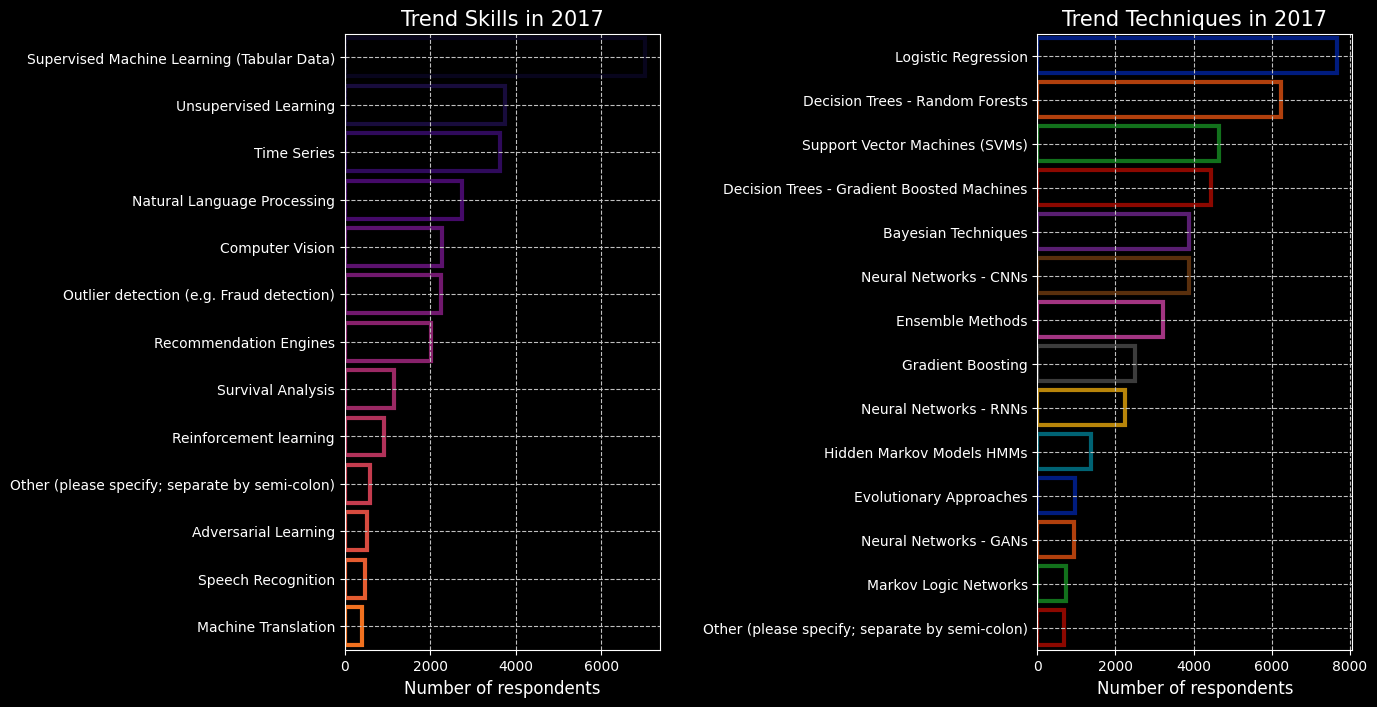

In [79]:
f, ax = plt.subplots(1,2,figsize=(13,8))

skills = mulchrep['MLSkillsSelect'].str.split(',')
skills_set = []
for i in skills.dropna():
    skills_set.extend(i)
skill = pd.Series(skills_set).value_counts().sort_values(ascending=False).to_frame()

sb.barplot(skill[0], skill.index, facecolor=(0, 0, 0, 0), linewidth=3, 
           edgecolor=sb.color_palette('inferno', 18), ax=ax[0])

ax[0].set_title('Trend Skills in 2017', fontsize=15)
ax[0].set_xlabel('Number of respondents', fontsize=12)
ax[0].grid(color = 'silver', linestyle='--')

tool = mulchrep['MLTechniquesSelect'].str.split(',')
tool_set = []
for i in tool.dropna():
    tool_set.extend(i)
tool = pd.Series(tool_set).value_counts().sort_values(ascending=False)[:15].to_frame()

sb.barplot(tool[0], tool.index, facecolor=(0, 0, 0, 0), linewidth=3,
           edgecolor=sb.color_palette('dark', 18), ax = ax[1])

ax[1].set_title('Trend Techniques in 2017', fontsize=15)
ax[1].set_xlabel('Number of respondents', fontsize=12)
ax[1].grid(color = 'silver', linestyle='--')
plt.subplots_adjust(wspace=1.2)

**2018 will be the year of Deep Learning!**

In [88]:
next_skills = mulchrep['MLMethodNextYearSelect'].str.split(',')
next_skills_set = []
for i in next_skills.dropna():
    next_skills_set.extend(i)
next_skill = pd.Series(next_skills_set).value_counts()[:8]

label = (np.array(next_skill.index))
size = next_skill.values

trace = go.Pie(
    labels=label,
    values=size,
    marker=dict(colors=colors)
)

data =[trace]
layout = go.Layout(title='Trend Methods in 2018')

fig = go.Figure(data=data, layout=layout)
po.iplot(fig)

In [87]:
next_tool = mulchrep['MLToolNextYearSelect'].str.split(',')
next_tool_set = []
for i in next_tool.dropna():
    next_tool_set.extend(i)
next_tool = pd.Series(next_tool_set).value_counts()[:12]

label = (np.array(next_tool.index))
size = next_tool.values

trace = go.Pie(
    labels=label,
    values=size,
    marker=dict(colors=colors)
)

data = [trace]
layout = go.Layout(title='Trend Tools in 2018')

fig = go.Figure(data=data, layout=layout)
po.iplot(fig)

**When you need to find data Kaggle, Socrata helps, when you need to share codes, git helps.**

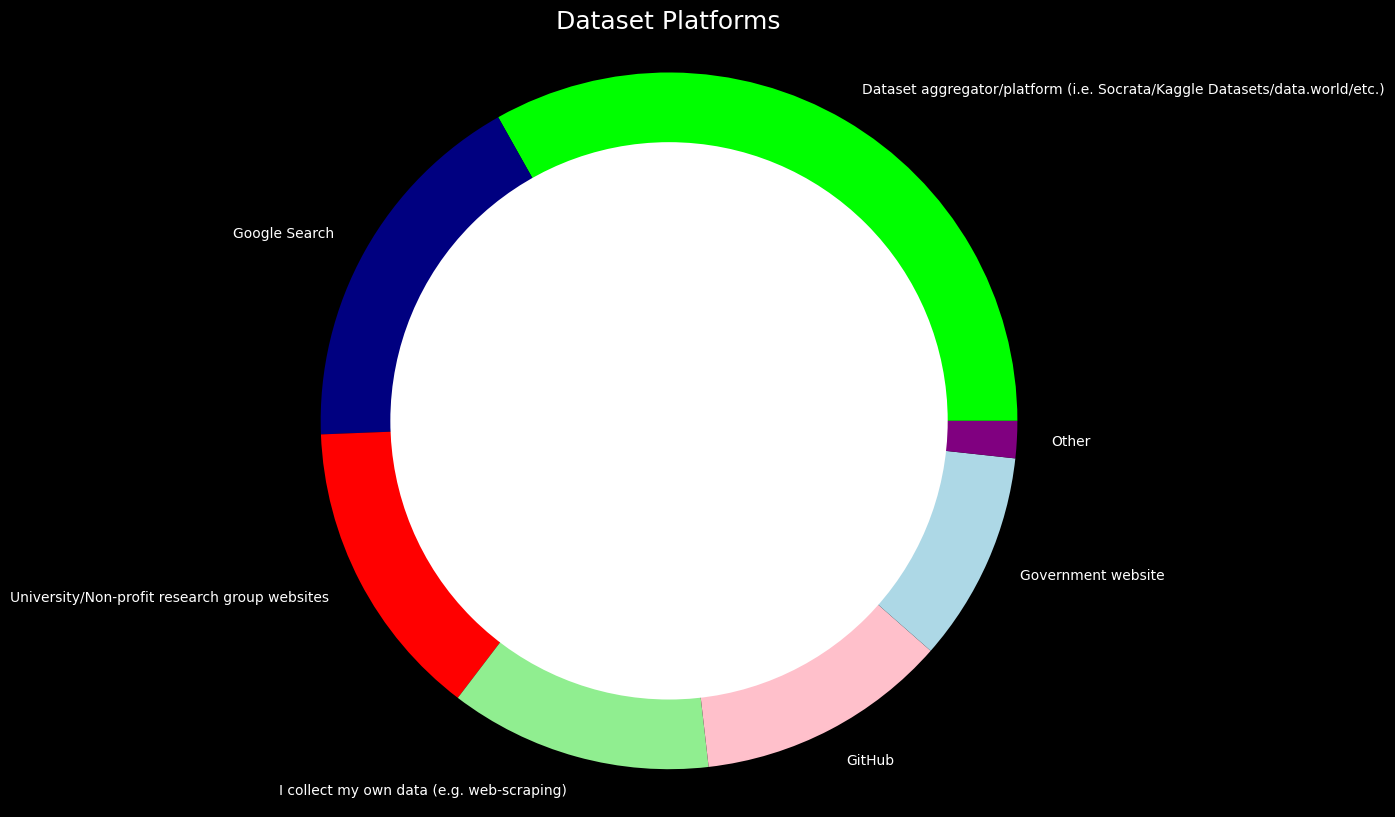

In [98]:
plt.figure(figsize=(14,10))

data = mulchrep['PublicDatasetsSelect'].str.split(',')
data_set = []
for i in data.dropna():
    data_set.extend(i)
data = pd.Series(data_set).value_counts().sort_values(ascending = False)[:15].to_frame()  

colors2 = ['lime', 'navy', 'red', 'lightgreen', 'pink', 'lightblue', 'purple']
plt.pie(data[0], labels=data.index, shadow = False, autopct='%1.1f%%', colors = colors2)     
centre_circle = plt.Circle((0,0),0.80, fc='white' ,linewidth=1.25)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.axis('equal')
plt.title('Dataset Platforms', fontsize =18);

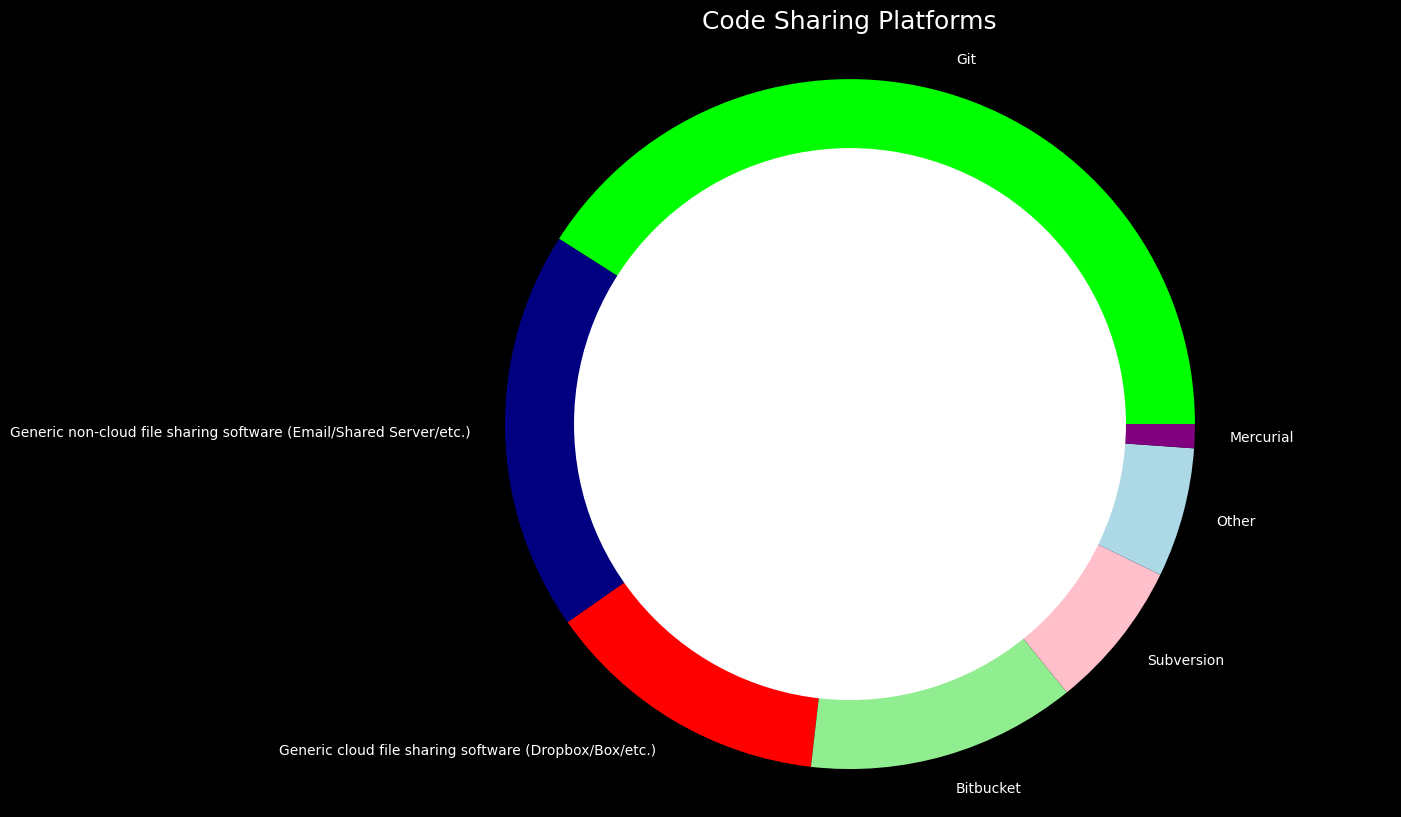

In [101]:
plt.figure(figsize=(14, 10))

code = mulchrep['WorkCodeSharing'].str.split(',')
code_set = []
for i in code.dropna():
    code_set.extend(i)
code = pd.Series(code_set).value_counts().sort_values(ascending = False)[:15].to_frame()  

colors2 = ['lime', 'navy', 'red', 'lightgreen', 'pink', 'lightblue', 'purple']
plt.pie(code[0], labels=code.index, shadow = False, autopct='%1.1f%%', colors=colors2)     
centre_circle = plt.Circle((0,0),0.80, fc='white' ,linewidth=1.25)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.axis('equal')
plt.title('Code Sharing Platforms', fontsize = 18);

**It would be great if we would download and build models on the famous iris data-set everyday but we should spend  our most time (%60-%70) to clean the data, not to build cool algorithms and models.**

In [102]:
challenge = mulchrep['WorkChallengesSelect'].str.split(',')
challenge_set = []

for i in challenge.dropna():
    challenge_set.extend(i)
challenges = pd.Series(challenge_set).value_counts()[:5]

label = (np.array(challenges.index))
size = challenges.values

trace = go.Pie(labels=label, 
               values=size, 
               marker=dict(colors=colors))

data = [trace]
layout = go.Layout(
    title='Challenges in Data Science', 
    legend=dict(orientation="h"))

fig = go.Figure(data=data, layout=layout)
po.iplot(fig)

* **There are two powerful tools and communities in data science: Python and R. Somehow it is hard to select which language a newbie starts in data science. Although  I am a big fan of Python, I would not give many comments in this section.**
* **These graphs speak for themselves!**

In [114]:
mulchrep = mulchrep.dropna(subset=['WorkToolsSelect'])
Python = mulchrep[(mulchrep['WorkToolsSelect'].str.contains('Python')) & 
                  (~mulchrep['WorkToolsSelect'].str.contains('R'))]
R = mulchrep[(~mulchrep['WorkToolsSelect'].str.contains('Python')) & 
             (mulchrep['WorkToolsSelect'].str.contains('R'))]

colors = ['cyan', 'gold', 'bisque', '#D0F9B1', 'tan', 'lightgrey', 'lightblue', 'lightgreen', 'c', 
          'wheat', 'tomato', 'y', 'cyan', 'bisque', 'tan']

py_major = Python['MajorSelect'].value_counts()[:8]
label = (np.array(py_major.index))
size = py_major.values
trace1 = go.Pie(labels=label, values=size, name='Python',
                marker=dict(colors=colors), domain = dict(x = [0,.48]), hole = .2)

r_major = R['MajorSelect'].value_counts()[:8]
label = (np.array(r_major.index))
size = r_major.values
trace2 = go.Pie(labels=label, values=size, name='R',
                marker=dict(colors=colors), domain = dict(x = [0.52,1]), hole = .2)

data = [trace1,trace2]
layout = go.Layout(
        title='Majors of Respondents',
        annotations=[dict(text = 'Python Users',
                          font = dict(size=13),
                          x = .18, y = 1.1,
                          showarrow=False),
                     dict(text = "R Users",
                          font = dict(size=13),
                          showarrow=False,
                          x = .8, y =1.1)]
)

fig = go.Figure(data=data, layout=layout)
po.iplot(fig)

In [124]:
py_ind = Python['CurrentJobTitleSelect'].value_counts()[:12]
f_py = py_ind.to_frame()
as_list = f_py.index.tolist()
f_py.index = as_list

trace = go.Bar(
    x=f_py.index,
    y=f_py.CurrentJobTitleSelect,
    marker=dict(
        color=f_py.CurrentJobTitleSelect,
        colorscale = 'Jet',
        reversescale = True)
)

data = [trace]
layout = go.Layout(
    title='Job Titles of Python Users', yaxis = dict(title = '# of Respondents')
)

fig = go.Figure(data=data, layout=layout)
po.iplot(fig)

In [123]:
R_ind = R['CurrentJobTitleSelect'].value_counts()[:12]
f_r = R_ind.to_frame()
as_list = f_r.index.tolist()
f_r.index = as_list

trace = go.Bar(
    x=f_r.index,
    y=f_r.CurrentJobTitleSelect,
    marker=dict(
        color=f_r.CurrentJobTitleSelect,
        colorscale = 'Viridis',
        reversescale = True))

data = [trace]
layout = go.Layout(
    title='Job Titles of R Users', yaxis = dict(title = '# of Respondents')
)

fig = go.Figure(data=data, layout=layout)
po.iplot(fig)

In [133]:
Py_ind = Python['EmployerIndustry'].value_counts()[:12]

trace = go.Scatter(
    x=Py_ind.index,
    y=Py_ind.values,
    mode='markers',
    marker=dict(
        sizemode = 'diameter',
        sizeref = 1,
        size =20,
        color = Py_ind.values,
        colorscale='Portland',
        showscale=True)
)

data = [trace]
layout = go.Layout(
    title='Industries of Python users', yaxis = dict(title = '# of Respondents')
)

fig = go.Figure(data=data, layout=layout)
po.iplot(fig)

In [134]:
R_ind = R['EmployerIndustry'].value_counts()[:12]

trace = go.Scatter(
    x=R_ind.index,
    y=R_ind.values,
    mode='markers',
    marker=dict(
        symbol = 'triangle-up',
        sizemode = 'diameter',
        sizeref = 1,
        size = 20,
        color = R_ind.values,
        colorscale='Portland',
        showscale=True)
)

data = [trace]
layout = go.Layout(
    title='Industries of R users', yaxis = dict(title = '# of Respondents')
)

fig = go.Figure(data=data, layout=layout)
po.iplot(fig)

In [137]:
data = Python['WorkDataTypeSelect'].str.split(',')
data_set = []
for i in data.dropna():
    data_set.extend(i)
r_datas = pd.Series(data_set).value_counts()[:10].sort_values(ascending = False).to_frame()  

trace = go.Bar(
    x=r_datas.index,
    y=r_datas[0].values,
    marker=dict(
        color=r_datas[0],
        colorscale = [[0, 'rgb(166,206,227)'], [0.25, 'rgb(31,120,180)'], 
                      [0.45, 'rgb(178,223,138)'], 
                      [0.65, 'rgb(51,160,44)'], [0.85, 'rgb(251,154,153)'], 
                      [1, 'rgb(227,26,28)']],
        reversescale = True))

data = [trace]
layout = go.Layout(
    title='Data Types Frequently Used by Python Users', 
    yaxis = dict(title = '# of Respondents')
)

fig = go.Figure(data=data, layout=layout)
po.iplot(fig)

In [139]:
data = R['WorkDataTypeSelect'].str.split(',')
data_set = []
for i in data.dropna():
    data_set.extend(i)
py_datas = pd.Series(data_set).value_counts()[:10].sort_values(ascending = False).to_frame()  

trace = go.Bar(
    x=py_datas.index,
    y=py_datas[0].values,
    marker=dict(
        color=py_datas[0],
        colorscale = 'Jet',
        reversescale = True)
)

data = [trace]
layout = go.Layout(
    title='Data Types Frequently Used by R Users', 
    yaxis = dict(title = '# of Respondents')
)

fig = go.Figure(data=data, layout=layout)
po.iplot(fig)

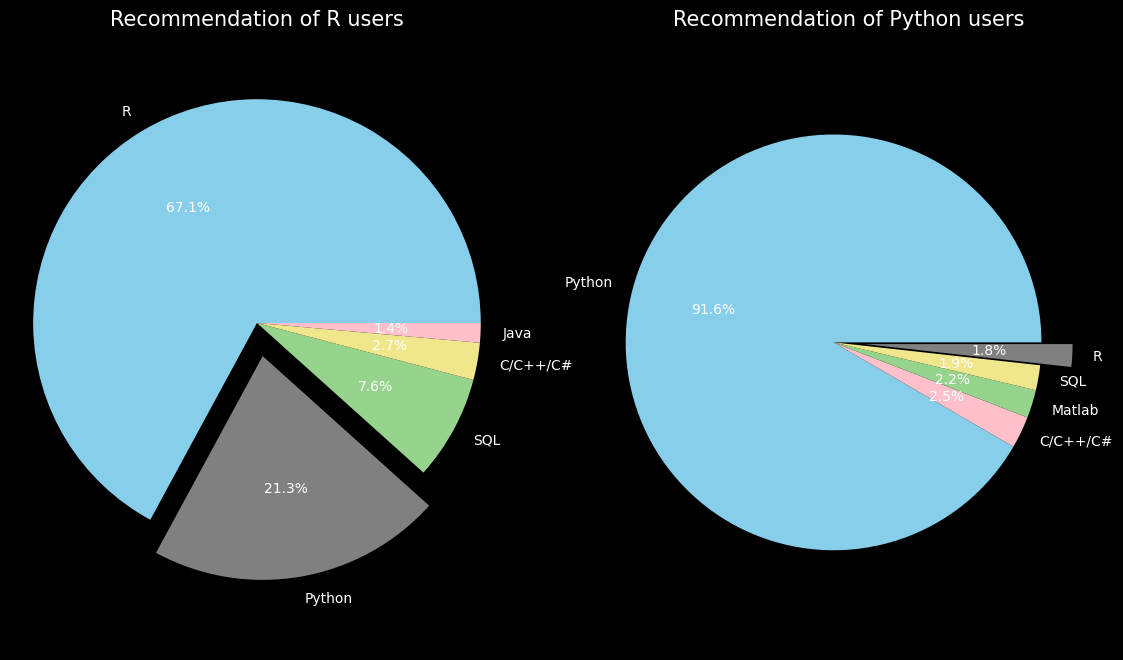

In [145]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 8))

colors2 = ['skyblue', 'grey', '#96D38C', 'khaki', 'pink']
temp = R['LanguageRecommendationSelect'].value_counts()[:5]
labels = temp.index
sizes = temp.values

ax1.pie(sizes, labels=labels, shadow = False, autopct='%1.1f%%', 
        explode=(0, 0.15, 0, 0, 0), 
        colors = colors2)
ax1.axis('equal')
ax1.set_title('Recommendation of R users', fontsize = 15)

colors2 = ['skyblue', 'pink', '#96D38C', 'khaki', 'grey']
temp = Python['LanguageRecommendationSelect'].value_counts()[:5]
labels = temp.index
sizes = temp.values

ax2.pie(sizes, labels=labels, shadow = False, autopct='%1.1f%%', 
        explode=(0, 0,0,0,0.15),
        colors = colors2)
ax2.axis('equal')
ax2.set_title('Recommendation of Python users', fontsize = 15);

**If you decide which language you start with, these are most frequently used tools  by respondents at work.**

In [147]:
data = Python['WorkToolsSelect'].str.split(',')
data_set = []
for i in data.dropna():
    data_set.extend(i)
datas = pd.Series(data_set).value_counts()[1:10].sort_values(ascending = False).to_frame()  

trace = go.Bar(
    x=datas.index,
    y=datas[0].values,
    marker=dict(
        color=datas[0],
        colorscale = 'Jet',
        reversescale = True)
)

data = [trace]
layout = go.Layout(
    title = 'Tools of Python Users at Work', yaxis = dict(title = '# of Respondents')
)

fig = go.Figure(data=data, layout=layout)
po.iplot(fig)

In [148]:
data = R['WorkToolsSelect'].str.split(',')
data_set = []
for i in data.dropna():
    data_set.extend(i)
datas = pd.Series(data_set).value_counts()[1:10].sort_values(ascending = False).to_frame()  

as_list = datas.index.tolist()
idx = as_list.index('Microsoft Excel Data Mining')
as_list[idx] = 'Excel Data Mining'
datas.index = as_list

trace = go.Bar(
    x=datas.index,
    y=datas[0].values,
    marker=dict(
        color=datas[0],
        colorscale = 'Jet',
        reversescale = True)
)

data = [trace]
layout = go.Layout(
    title='Tools of R Users at Work', yaxis = dict(title = '# of Respondents')
)

fig = go.Figure(data=data, layout=layout)
po.iplot(fig)